In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
data_location = "properati.csv"

data = pd.read_csv(data_location)
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [113]:
data.shape

(121220, 26)

In [114]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [116]:
data2 = data.loc[:, ['price','currency','price_aprox_local_currency', 'price_aprox_usd']]
data2

,price,currency,price_aprox_local_currency,price_aprox_usd
0,62000.0,USD,1093959.00,62000.0
1,150000.0,USD,2646675.00,150000.0
2,72000.0,USD,1270404.00,72000.0
3,95000.0,USD,1676227.50,95000.0
4,64000.0,USD,1129248.00,64000.0
...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0
121216,498000.0,USD,8786961.00,498000.0
121217,131500.0,USD,2320251.75,131500.0
121218,95900.0,USD,1692107.55,95900.0


In [117]:
data.isnull().sum() / data.shape[0] * 100

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [118]:
data.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [119]:
data.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [120]:
## VAMOS A ANALIZAR LA VARIABLE 'SUP. CUBIERTA' SEGUN EL 'TIPO DE PROPIEDAD', 
## ELEGIMOS SUP. CUBIERTA PORQUE SOLO TIENE EL 16% DE NULOS

data.groupby('property_type')['surface_covered_in_m2'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4913.0,87.66,138.84,1.0,51.0,73.0,104.0,6610.0
apartment,59735.0,74.04,805.14,0.0,40.0,52.0,76.0,187000.0
house,33510.0,217.84,420.28,1.0,120.0,180.0,260.0,38240.0
store,3155.0,420.39,1562.61,1.0,42.0,120.0,300.0,35000.0


<AxesSubplot:xlabel='property_type', ylabel='surface_covered_in_m2'>

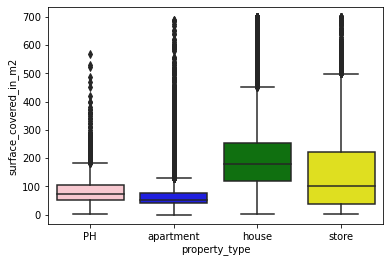

In [121]:
## HACEMOS UN BOXPLOT PARA VER SI HAY OUTLIER

mask_sup_cub = data.surface_covered_in_m2.apply(lambda x: x <= 700)

palette_property_type = ["pink", "blue", "green", "yellow"]

sns.boxplot(data.property_type, data.surface_covered_in_m2[mask_sup_cub], palette = palette_property_type)

In [142]:
## CALCULOS DE LOS OUTLIER DE 'SUP. CUBIERTA' SEGUN EL 'TIPO DE PROPIEDAD'

q1 = data.groupby('property_type')['surface_covered_in_m2'].quantile(0.25)
q3 = data.groupby('property_type')['surface_covered_in_m2'].quantile(0.75)

iqr = (q3 - q1) * 1.5

PH_up_threshold = q3['PH'] + iqr['PH']
apartment_up_threshold = q3['apartment'] + iqr['apartment']
house_up_threshold = q3['house'] + iqr['house']
store_up_threshold = q3['store'] + iqr['store']

print('Outilers de Sup. Cubierta')
print('PH > ', PH_up_threshold, 'm2')
print('apartment > ', apartment_up_threshold, 'm2')
print('house > ', house_up_threshold, 'm2')
print('store > ', store_up_threshold, 'm2')

Outilers de Sup. Cubierta
PH >  183.5 m2
apartment >  130.0 m2
house >  470.0 m2
store >  687.0 m2


In [123]:
## VAMOS A ANALIZAR LA VARIABLE 'PRECIO APROX EN USD' SEGUN EL 'TIPO DE PROPIEDAD'
## ELEGIMOS PRECIO APROX EN USD PORQUE SOLO TIENE EL 16% DE NULOS

data.groupby('property_type')['price_aprox_usd'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5220.0,147689.0,148895.0,5048.0,85000.0,120000.0,165000.0,2800000.0
apartment,59616.0,187407.0,316218.0,4667.0,80000.0,119000.0,190000.0,46545445.0
house,32715.0,329697.0,458209.0,0.0,140000.0,240000.0,384450.0,25000000.0
store,3259.0,440257.0,761394.0,4952.0,95000.0,210000.0,450000.0,13000000.0


<AxesSubplot:xlabel='property_type', ylabel='price_aprox_usd'>

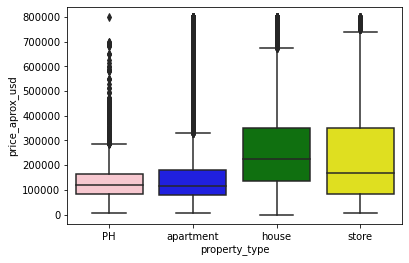

In [145]:
## HACEMOS UN BOXPLOT PARA VER SI HAY OUTLIER

mask_price_usd = data.price_aprox_usd.apply(lambda x: x <= 800000)

sns.boxplot(data.property_type, data.price_aprox_usd[mask_price_usd], palette = palette_property_type)

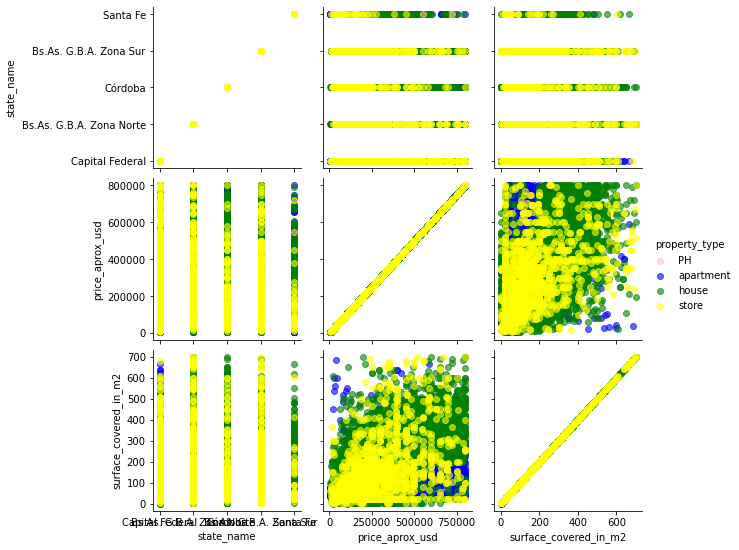

In [124]:
## VAMOS A ANALIZAR SI HAY CORRELACION ENTRE LAS VARIABLES 'ESTADO','PRECIO APROX EN USD; Y ;SUP. CUBIERTA'
## NOS QUEDAMOS CON LOS 5 PRINCIPALES ESTADO QUE ACUMULAN EL 80% DE LAS PROPIEDADES EN ARGENTINA

state_values = ['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Córdoba', 'Santa Fe']

mask_state_mask = data.state_name.apply(lambda x: x in state_values)

mask_state_sup_price = mask_state_mask & mask_sup_cub & mask_price_usd 
data_mask = data.loc[mask_state_sup_price, :]


g = sns.PairGrid(data_mask, vars=['state_name', 'price_aprox_usd', 'surface_covered_in_m2'],
                 hue='property_type', palette=palette_property_type)

g.map(plt.scatter, alpha=0.6)
g.add_legend()

In [141]:
## VAMOS A COMPLETAR LA COLUMNA 'SUP. CUBIERTA'

data['surface_cub_completa'] = data.groupby(['property_type', 'state_name'])['surface_covered_in_m2'].transform(lambda grp: grp.fillna(grp.median()))

data['surface_cub_completa'] = data.groupby('property_type')['surface_covered_in_m2'].transform(lambda grp: grp.fillna(grp.median()))

print(data.surface_covered_in_m2.isnull().sum())
print(data.surface_cub_completa.isnull().sum())

data[['surface_covered_in_m2', 'surface_cub_completa']]

19907
0


C:\Users\djuar\anaconda3\envs\dhdsblend\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,surface_covered_in_m2,surface_cub_completa
0,40.0,40.0
1,NaN,52.0
2,55.0,55.0
3,NaN,73.0
4,35.0,35.0
...,...,...
121215,93.0,93.0
121216,360.0,360.0
121217,39.0,39.0
121218,48.0,48.0


In [106]:
# VAMOS A COMPLETAR LA COLUMNA 'SUP. TOTAL' 

data['surface_total_completa'] = data.apply(lambda x: x['surface_total_in_m2'] if x['surface_total_in_m2'] >= x['surface_covered_in_m2'] else x['surface_covered_in_m2'], axis=1)

print(data.surface_total_in_m2.isnull().sum())
print(data.surface_total_completa.isnull().sum())

39328
19907


In [50]:
# CREAMOS UNA ETIQUETA PARA CADA UNA DE LAS FILAS DEL DATASET ORIGINAL

import numpy as np
data['tag']=np.arange(len(data))
data.head(5)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,coef_sup_cub_total,tag
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0.0,0
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,NaN,1
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0,2
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,NaN,3
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,0.0,4
